In this (relaxed) tutorial, the goal is to explore the difference between K-Means and GMM on different data sets, which are more or less separable.  

For this, the data is generated artificially.  We'll assume each cluster is generated by a Normal (Gaussian) law. 

These data points live in two dimensions, so as to ease graphical representation

# Data generation and clustering

In [1]:
# imports
import numpy as np
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import random
np.random.seed(3) # for reproducibility

## "gaussian" generation

We'll use *np.random.multivariate_normal()*
- Read the docs !!
- We'll generate two batches of points (each batch stands for 1 class) :
    - 1500 points drawn from a gaussian of average (4,4) and diagonal variance (2,2). 
    - 500 points drawn from a gaussian of average (0,0) and diagonal variance (1,1). 
- Generate the points, then represent them in two ways:
    - with a single color
    - with a different color for each cluster 

In [2]:
# we define by hand the parameters, theta:(mu, Sigma)_k for each class k, and pi_k (weight of each class)

m1 = np.zeros(2)  # average of first gaussian (vector mu)
m2 = np.ones(2)*4 # average of first gaussian (vector mu)
#m1[1]=4

cov1 = np.eye(2)*1 # variance 1
cov2 = np.eye(2)*2 # variance 2
#cov1[0,0]= 4
#cov1[1,1]=0.5
print cov1
print cov2

N1=500  # number of points for first cluster
N2=1500 # number of points for 2nd   cluster
# here pi_1 = 1/4
# and  pi_2 = 3/4

[[1. 0.]
 [0. 1.]]
[[2. 0.]
 [0. 2.]]


In [3]:
# Generation 
np.random.seed(3) # for reproducibility
data1= np.random.multivariate_normal(m1,cov1,N1)
data2= np.random.multivariate_normal(m2,cov2,N2)

alldata = np.zeros((N1+N2,2))
alldata[0:N1,:] = data1
alldata[N1:,:] = data2
print data1.shape, data2.shape, alldata.shape

(500, 2) (1500, 2) (2000, 2)


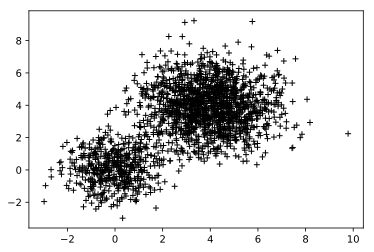

In [4]:
plt.plot(alldata[:,0], alldata[:,1],'k+')

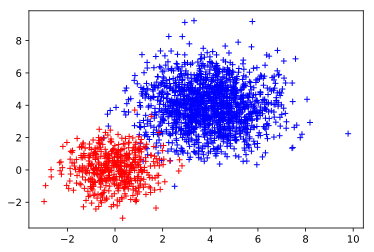

In [5]:
plt.plot(data2[:,0], data2[:,1],'b+')
plt.plot(data1[:,0], data1[:,1],'r+')

Can you predict what the Kmeans clustering will produce ?

## Clustering 

- Cluster the data using $K=2$
- Draw the results
- Compute the  *"error"* of the clustering, *by hand* (not using scikit-learn's routines)
- Do the same with a GMM, still with $K=2$, compare graphically and quantitatively the results.
- Represent the data so that:
    - in blue, point classified the same way by K-means and GMMs.
    - in red, points that are classified differently
What do you notice ?

In [6]:
from sklearn.cluster import KMeans

kmeans_model_instance = KMeans(n_clusters=2, random_state=0)
aff_kmeans = kmeans_model_instance.fit_predict(alldata)

centers=kmeans_model_instance.cluster_centers_
centers

array([[4.02622409, 4.01565409],
       [0.11247001, 0.26165017]])

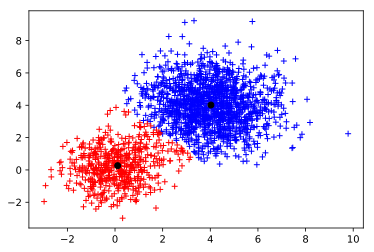

In [7]:
K=2
colors=["blue", "red"]
for k in range(K):
    filterArray = (aff_kmeans==k)
    plt.plot(alldata[filterArray,0],alldata[filterArray,1], marker="+", linestyle="", color=colors[k])
    plt.plot(centers[k][0],centers[k][1],'ko')

- Compute the  *"error"* of the clustering, *by hand* (not using scikit-learn's routines)

In [8]:
## let's compute the error
true_affectations=np.zeros(N1+N2, dtype=int)
true_affectations[:N1] = 1 ## actually we can't know if it's 0-1 or 1-0.. class numbers are arbitrary !
true_affectations[N1:N1+N2] = 0
errorRate = np.mean(true_affectations != aff_kmeans)
errorRate

0.0295

In [9]:
## we make it into a function:
def erroRate(predicted_affectations):
    true_affectations=np.zeros(N1+N2, dtype=int)
    true_affectations[:N1] = 1
    true_affectations[N1:N1+N2] = 0
    errorRate = np.mean(true_affectations != predicted_affectations)
    print("errorRate: either ", errorRate, " or ", 1-errorRate)
    return errorRate
erroRate(aff_kmeans)

('errorRate: either ', 0.0295, ' or ', 0.9705)


0.0295

- Do the same with a GMM, still with $K=2$, compare graphically and quantitatively the results.

In [10]:
from sklearn.mixture import GaussianMixture
def predict_and_plot(alldata, covariance_type, K):
    g = GaussianMixture(n_components=K,covariance_type='full',init_params='kmeans')
    g.fit(alldata)
    affg=g.predict(alldata)
    
    for k in range(K):
        filterArray = affg==k
        plt.plot(alldata[filterArray,0],alldata[filterArray,1], "+")
        plt.plot(g.means_[k][0],g.means_[k][1],'ko')
#     filterArray = affg==1
#     plt.plot(alldata[filterArray,0],alldata[filterArray,1], "b+")
#     plt.plot(g.means_[1][0],g.means_[1][1],'ko')
    plt.show()

    return affg

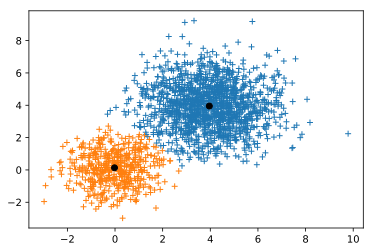

('errorRate: either ', 0.0105, ' or ', 0.9895)


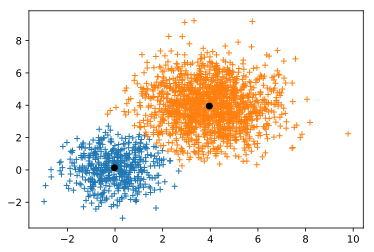

('errorRate: either ', 0.9895, ' or ', 0.010499999999999954)


0.9895

In [11]:
K=2
covariance_type = 'diag'
aff_gauss_diag = predict_and_plot(alldata,covariance_type, K)
erroRate(aff_gauss_diag)
covariance_type = 'full'
aff_gauss_full = predict_and_plot(alldata,covariance_type, K)
erroRate(aff_gauss_full)

- Represent the data so that:
    - in blue, point classified the same way by K-means and GMMs.
    - in red, points that are classified differently

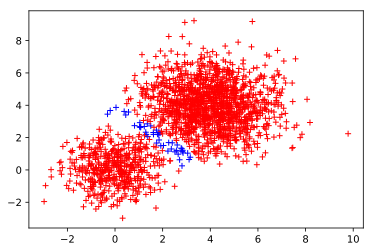

In [12]:
filterArray = (aff_gauss_full == aff_kmeans)
plt.plot(alldata[filterArray,0], alldata[filterArray,1], '+', color="blue")
filterArray = (aff_gauss_full != aff_kmeans)
plt.plot(alldata[filterArray,0], alldata[filterArray,1], '+', color="red")

plt.show()

What is the main criticism you should make on this tutorial ? (think of the methods compared and the synthetic data generation) ?

# ANSWER: 

here we generated gaussians, so of course a Gaussian model will always do better !

# A bit harder 

to make the task more difficult (for the algorithm, not you), we're going to change generating parameters:
- 1500 points drawn from a gaussian of average (4,4) and diagonal variance (2,2). 
- 500 points drawn from a gaussian of average (0,**4**) and diagonal variance (1,1). 

With these new data : 
- Re-do the previous question, compare results
- If we increase the cluster number to 3 and then to 4, what do we notice, when using GMMs ?

Repeat these experiments with the following generating parameters:
- 1500 points drawn from a gaussian of average (4,4) and diagonal variance (2,2). 
- 500 points drawn from a gaussian of average (0,4) and diagonal variance (**4,0.1**).


[[4.  0. ]
 [0.  0.1]]
[[2. 0.]
 [0. 2.]]
(500, 2) (1500, 2) (2000, 2)


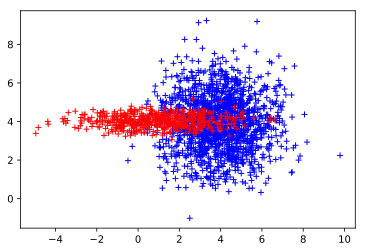

In [13]:
# we define by hand the parameters, theta:(mu, Sigma)_k for each class k, and pi_k (weight of each class)

m1 = np.zeros(2)+1  # average of first gaussian (vector mu)
m2 = np.ones(2)*4 # average of first gaussian (vector mu)
m1[1]=4

cov1 = np.eye(2)*1 # variance 1
cov2 = np.eye(2)*2 # variance 2
cov1[0,0]=4
cov1[1,1]=0.1
print cov1
print cov2

N1=500  # number of points for first cluster
N2=1500 # number of points for 2nd   cluster
# here pi_1 = 1/4
# and  pi_2 = 3/4

# Generation 
np.random.seed(3) # for reproducibility
data1= np.random.multivariate_normal(m1,cov1,N1)
data2= np.random.multivariate_normal(m2,cov2,N2)

alldata = np.zeros((N1+N2,2))
alldata[0:N1,:] = data1
alldata[N1:,:] = data2
print data1.shape, data2.shape, alldata.shape

plt.plot(data2[:,0], data2[:,1],'b+')
plt.plot(data1[:,0], data1[:,1],'r+')

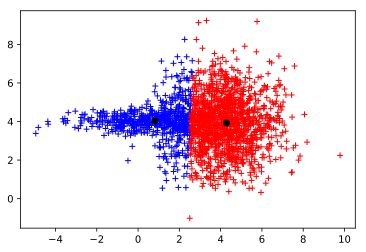

In [14]:
kmeans_model_instance = KMeans(n_clusters=2, random_state=0)
aff_kmeans = kmeans_model_instance.fit_predict(alldata)
centers=kmeans_model_instance.cluster_centers_

K=2
colors=["blue", "red"]
for k in range(K):
    filterArray = (aff_kmeans==k)
    plt.plot(alldata[filterArray,0],alldata[filterArray,1], marker="+", linestyle="", color=colors[k])
    plt.plot(centers[k][0],centers[k][1],'ko')

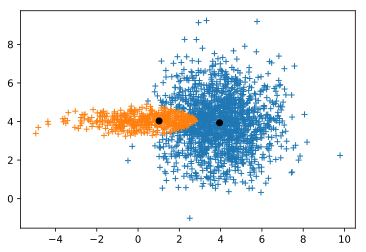

('errorRate: either ', 0.0925, ' or ', 0.9075)


0.0925

In [15]:
covariance_type = 'full'
aff_gauss_full = predict_and_plot(alldata,covariance_type, K)
erroRate(aff_gauss_full)

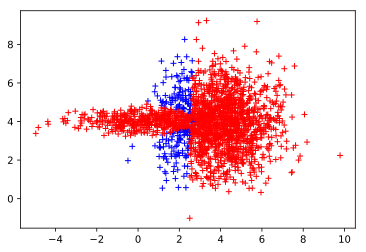

In [16]:
filterArray = (aff_gauss_full == aff_kmeans)
plt.plot(alldata[filterArray,0], alldata[filterArray,1], '+', color="blue")
filterArray = (aff_gauss_full != aff_kmeans)
plt.plot(alldata[filterArray,0], alldata[filterArray,1], '+', color="red")

plt.show()

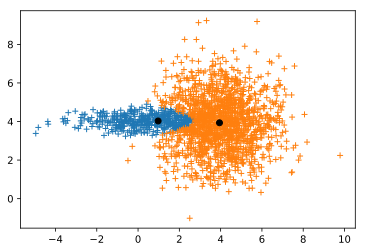

('errorRate: either ', 0.909, ' or ', 0.09099999999999997)


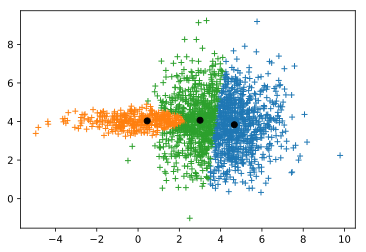

('errorRate: either ', 0.4045, ' or ', 0.5954999999999999)


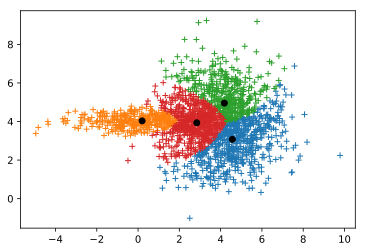

('errorRate: either ', 0.545, ' or ', 0.45499999999999996)


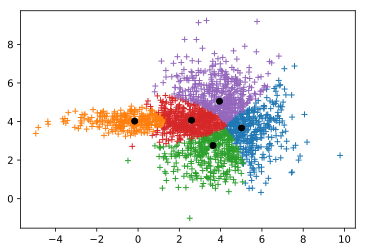

('errorRate: either ', 0.68, ' or ', 0.31999999999999995)


In [17]:
covariance_type = 'full'
for K in range(2,6):
    plt.figure()
    aff_gauss_full = predict_and_plot(alldata,covariance_type, K)
    erroRate(aff_gauss_full)

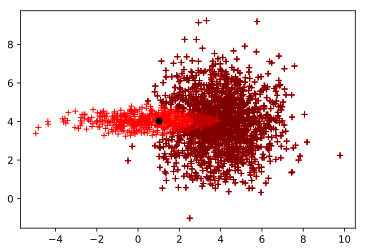

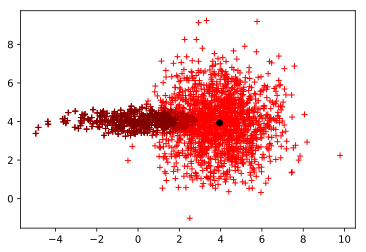

In [18]:
#### Posterior probabilities
n_comp = 2
front = [1., 0.75, 0.5, 0.25, 0.]
colors = [(1.*i, 0, 0) for i in front[:-1]]

g = GaussianMixture(n_components=n_comp,covariance_type='diag',init_params='kmeans')
g.fit(alldata)
affg=g.predict_proba(alldata)

for i in range(n_comp):
    for j, (v1, v2) in enumerate(zip(front[1:], front[:-1])):
        affg_v = affg[:,i]>v1 
        line = affg_v<=v2     
        plt.plot(alldata[line,0],alldata[line,1],'+', color=colors[j])
    plt.plot(g.means_[i][0],g.means_[i][1],'ko')
    plt.show()

What is the main criticism you should make on this tutorial ? (think of the methods compared and the synthetic data generation) ?

# ANSWER: 

here we generated gaussians, so of course a Gaussian model will always do better !